<a href="https://colab.research.google.com/github/byannurcahyo/2241720134-PCVK-2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Praktikum

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


----------------------------------
 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


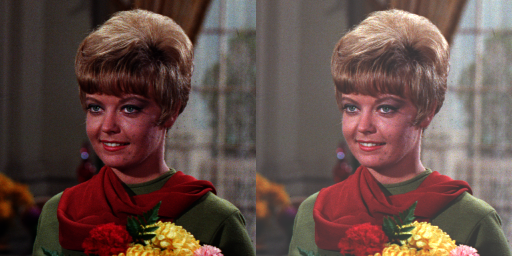

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

print('----------------------------------')
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

### Tugas Praktikum

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


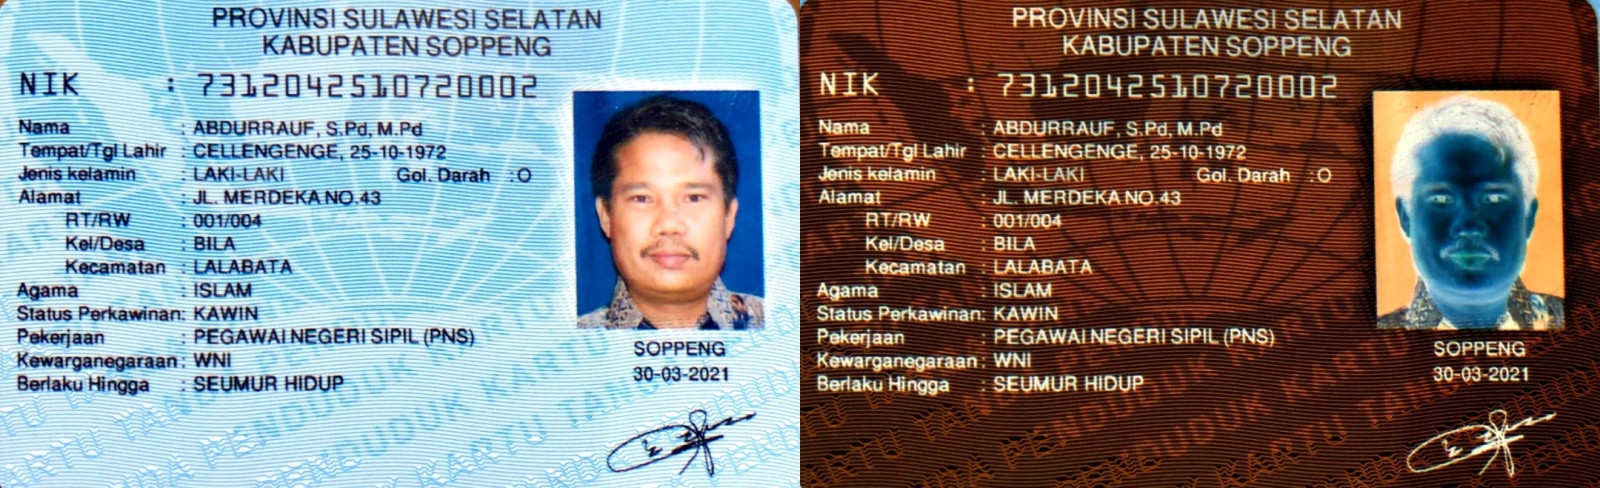

In [3]:
#1. Inverse Image
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

original = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')
inverse_image = cv.bitwise_not(original)
final_frame = cv.hconcat((original, inverse_image))
cv2_imshow(final_frame)

----------------------------------------------
 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]   : 2


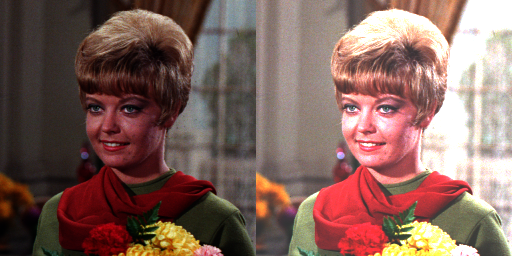

In [4]:
#2. Transformasi Contrast
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

print('----------------------------------------------')
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
    if brightness < -255 or brightness > 255:
        raise ValueError('Nilai kecerahan harus antara -255 dan 255')
    contrast = float(input('Masukkan nilai kontras [1.0 - 3.0]   : '))
    if contrast < 1.0 or contrast > 3.0:
        raise ValueError('Nilai kontras harus antara 1.0 dan 3.0')
except ValueError as e:
    print()
    print(f'Error: {e}')

else:
    original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
    log_image = np.zeros(original.shape, dtype=np.uint8)
    contrast_brightness_image = np.zeros_like(original)
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                contrast_brightness_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness, 0, 255)

    final_frame = cv.hconcat((original, contrast_brightness_image))
    cv2_imshow(final_frame)

----------------------------------------------------------
 Mengubah tingkat kecerahan citra dengan Transformasi log 
----------------------------------------------------------
Masukkan nilai kecerahan: 50


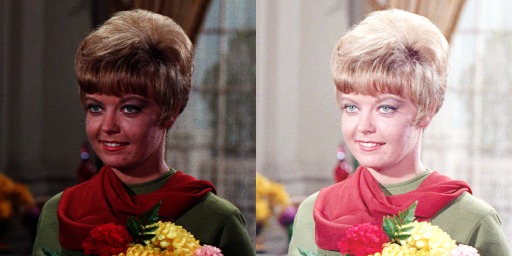

In [5]:
#3. Transformasi Logarithmic Brightness
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

print('----------------------------------------------------------')
print(' Mengubah tingkat kecerahan citra dengan Transformasi log ')
print('----------------------------------------------------------')

try:
  brightness = float(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')
else:
  original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
  log_image = np.zeros(original.shape, dtype=np.uint8)

  # Transformasi log
  for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      for c in range(original.shape[2]):
        log_image[y, x, c] = np.clip(brightness * np.log(1 + original[y, x, c]), 0, 255).astype(np.uint8)

  final_frame = cv.hconcat((original, log_image))
  cv2_imshow(final_frame)

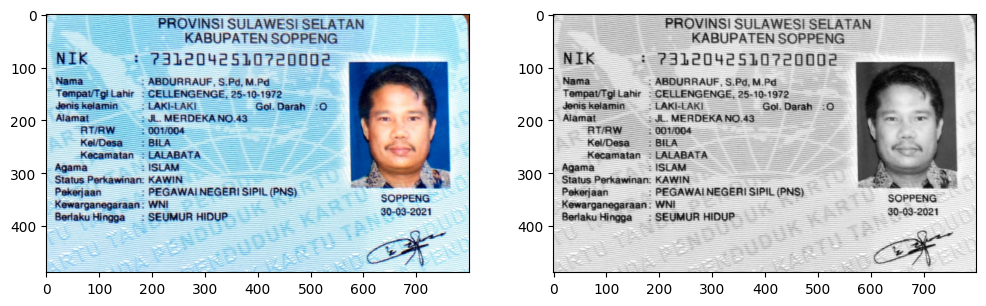

In [17]:
#4. Grayscale Averaging
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

gray_avg = np.mean(original, axis=2).astype(np.uint8)

# Mengatur ukuran gambar untuk ditampilkan
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'wspace': 0.2})

# Menampilkan gambar asli
axs[0].imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
axs[0].axis('on')  # Menyembunyikan sumbu

# Menampilkan gambar grayscale
axs[1].imshow(gray_avg, cmap='gray')
axs[1].axis('on')  # Menyembunyikan sumbu

# Menampilkan semua gambar
plt.show()

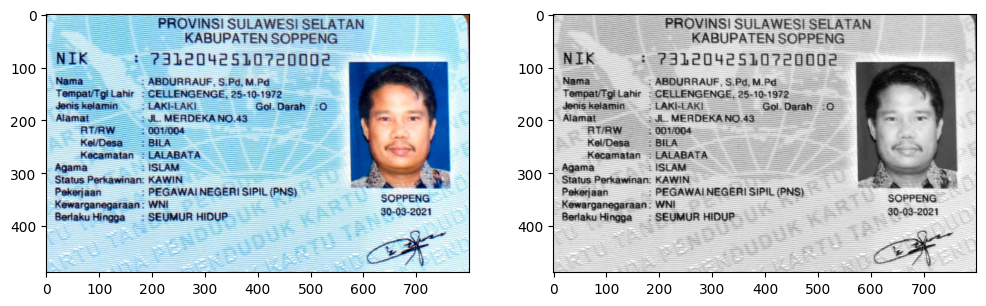

In [18]:
#4. Grayscale Lightness
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

gray_lightness = np.max(original, axis=2) / 2 + np.min(original, axis=2) / 2

# Mengatur ukuran gambar untuk ditampilkan
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'wspace': 0.2})

# Menampilkan gambar asli
axs[0].imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
axs[0].axis('on')  # Menyembunyikan sumbu

# Menampilkan gambar grayscale
axs[1].imshow(gray_lightness, cmap='gray')
axs[1].axis('on')  # Menyembunyikan sumbu

# Menampilkan semua gambar
plt.show()

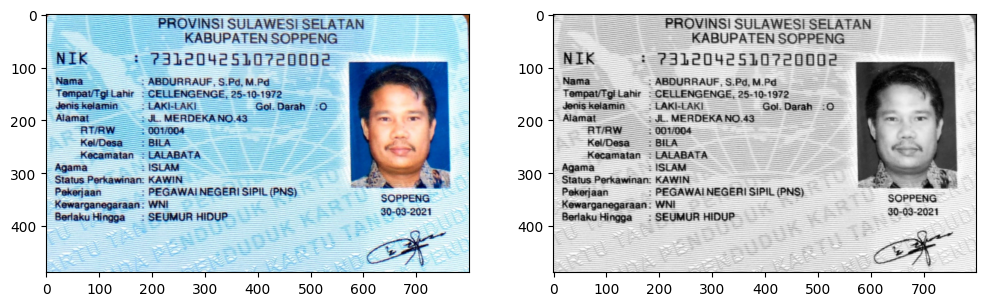

In [19]:
#4. Grayscale Luminance
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

gray_lumi = 0.21 * original[:, :, 2] + 0.72 * original[:, :, 1] + 0.07 * original[:, :, 0]

# Mengatur ukuran gambar untuk ditampilkan
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'wspace': 0.2})

# Menampilkan gambar asli
axs[0].imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
axs[0].axis('on')  # Menyembunyikan sumbu

# Menampilkan gambar grayscale
axs[1].imshow(gray_lumi, cmap='gray')
axs[1].axis('on')  # Menyembunyikan sumbu

# Menampilkan semua gambar
plt.show()

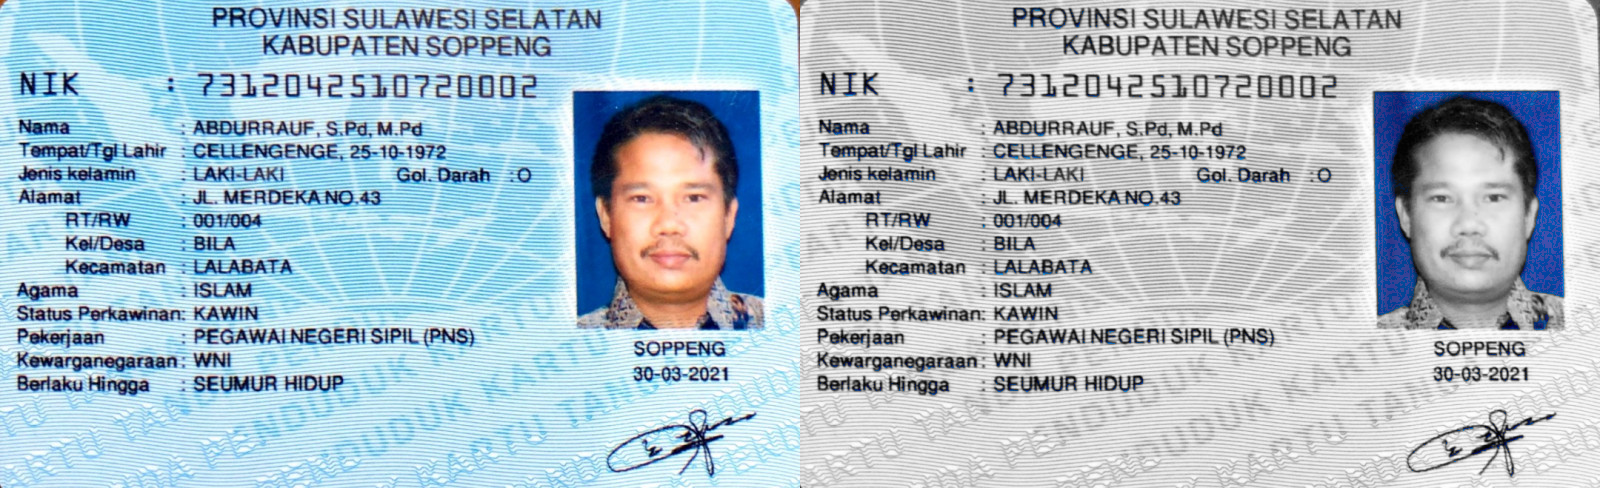

In [54]:
#5. Grayscale Biru
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

# Ubah ke HSV
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)

# Tentukan rentang warna biru di HSV
lower_blue = np.array([100,200,50])
upper_blue = np.array([130,255,255])

# Ambil mask untuk warna biru
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Terapkan mask ke gambar asli
res = cv.bitwise_and(original,original, mask= mask)

# Ubah gambar asli ke grayscale
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

# Ubah gambar grayscale ke BGR
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Gabungkan bagian biru dan bagian grayscale
result = np.where(res != 0, res, gray_bgr)

# Tampilkan hasilnya
final_frame = cv.hconcat((original, result))
cv2_imshow(final_frame)